(papr)=
# Peak-to-average power

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sdr

%config InlineBackend.print_figure_kwargs = {"facecolor" : "w"}
# %matplotlib widget

In [2]:
span = 8  # Length of the pulse shape in symbols
sps = 20  # Samples per symbol

In [3]:
# Create a BPSK impulse signal
N_symbols = 500
x = np.zeros(N_symbols * sps)
symbol_map = np.array([1, -1])
x[::sps] = symbol_map[np.random.randint(0, 2, N_symbols)]

## Rectangular pulse shape

In [4]:
# Pulse shape the signal with a rectangular pulse
h = np.zeros(span * sps + 1)
h[span * sps // 2 - sps // 2 : span * sps // 2 + sps // 2] = 1 / np.sqrt(sps)
x_bb_rect = np.convolve(x, h, mode="valid")
papr_bb_rect = sdr.papr(x_bb_rect)

x_pb_rect = x_bb_rect * np.exp(1j * np.pi / 5 * np.arange(x_bb_rect.size)).real
papr_pb_rect = sdr.papr(x_pb_rect)

## Square-root raised cosine pulse shape

In [5]:
# Pulse shape the signal with a square-root raised cosine filter
h = sdr.root_raised_cosine(0.9, span, sps)
x_bb_0p9 = np.convolve(x, h, mode="valid")
papr_bb_0p9 = sdr.papr(x_bb_0p9)

h = sdr.root_raised_cosine(0.5, span, sps)
x_bb_0p5 = np.convolve(x, h, mode="valid")
papr_bb_0p5 = sdr.papr(x_bb_0p5)

h = sdr.root_raised_cosine(0.1, span, sps)
x_bb_0p1 = np.convolve(x, h, mode="valid")
papr_bb_0p1 = sdr.papr(x_bb_0p1)

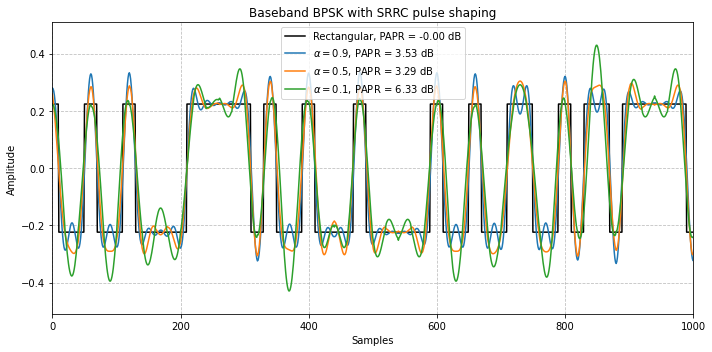

In [6]:
plt.figure(figsize=(10, 5))
sdr.plot.time_domain(x_bb_rect, color="k", label=f"Rectangular, PAPR = {papr_bb_rect:.2f} dB")
sdr.plot.time_domain(x_bb_0p9, label=rf"$\alpha = 0.9$, PAPR = {papr_bb_0p9:.2f} dB")
sdr.plot.time_domain(x_bb_0p5, label=rf"$\alpha = 0.5$, PAPR = {papr_bb_0p5:.2f} dB")
sdr.plot.time_domain(x_bb_0p1, label=rf"$\alpha = 0.1$, PAPR = {papr_bb_0p1:.2f} dB")
plt.xlim(0, 50 * sps)
plt.legend()
plt.title("Baseband BPSK with SRRC pulse shaping")
plt.tight_layout()
plt.show()

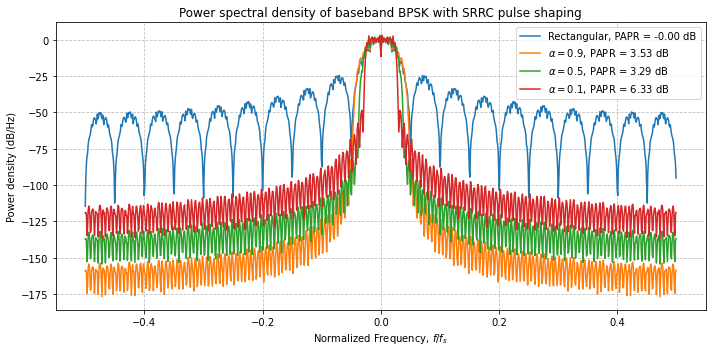

In [7]:
plt.figure(figsize=(10, 5))
sdr.plot.periodogram(x_bb_rect, length=1024, overlap=1024 - 256, label=f"Rectangular, PAPR = {papr_bb_rect:.2f} dB")
sdr.plot.periodogram(x_bb_0p9, length=1024, overlap=1024 - 256, label=rf"$\alpha = 0.9$, PAPR = {papr_bb_0p9:.2f} dB")
sdr.plot.periodogram(x_bb_0p5, length=1024, overlap=1024 - 256, label=rf"$\alpha = 0.5$, PAPR = {papr_bb_0p5:.2f} dB")
sdr.plot.periodogram(x_bb_0p1, length=1024, overlap=1024 - 256, label=rf"$\alpha = 0.1$, PAPR = {papr_bb_0p1:.2f} dB")
plt.title("Power spectral density of baseband BPSK with SRRC pulse shaping")
plt.show()

In [8]:
x_pb_0p9 = x_bb_0p9 * np.exp(1j * np.pi / 5 * np.arange(x_bb_0p9.size)).real
papr_pb_0p9 = sdr.papr(x_pb_0p9)

x_pb_0p5 = x_bb_0p5 * np.exp(1j * np.pi / 5 * np.arange(x_bb_0p5.size)).real
papr_pb_0p5 = sdr.papr(x_pb_0p5)

x_pb_0p1 = x_bb_0p1 * np.exp(1j * np.pi / 5 * np.arange(x_bb_0p1.size)).real
papr_pb_0p1 = sdr.papr(x_pb_0p1)

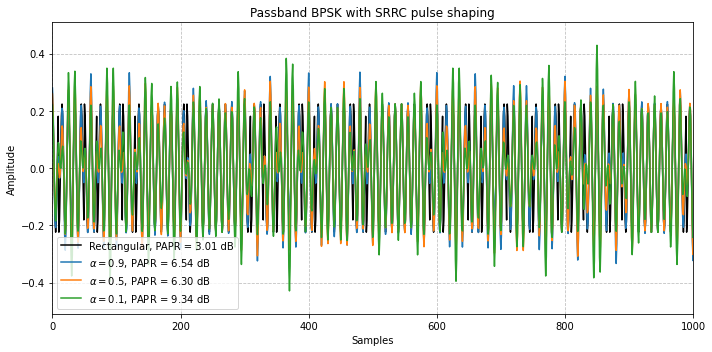

In [9]:
plt.figure(figsize=(10, 5))
sdr.plot.time_domain(x_pb_rect, color="k", label=f"Rectangular, PAPR = {papr_pb_rect:.2f} dB")
sdr.plot.time_domain(x_pb_0p9, label=rf"$\alpha = 0.9$, PAPR = {papr_pb_0p9:.2f} dB")
sdr.plot.time_domain(x_pb_0p5, label=rf"$\alpha = 0.5$, PAPR = {papr_pb_0p5:.2f} dB")
sdr.plot.time_domain(x_pb_0p1, label=rf"$\alpha = 0.1$, PAPR = {papr_pb_0p1:.2f} dB")
plt.xlim(0, 50 * sps)
plt.legend()
plt.title("Passband BPSK with SRRC pulse shaping")
plt.tight_layout()
plt.show()

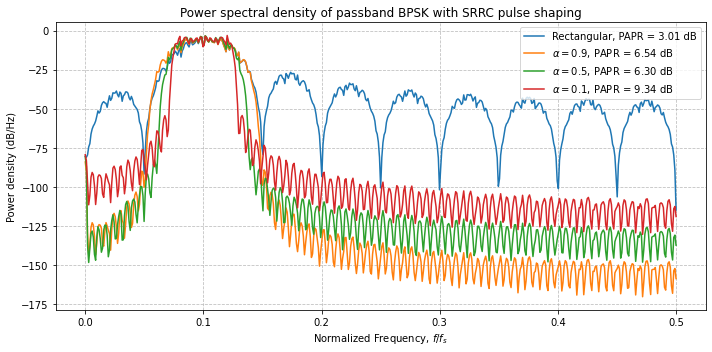

In [10]:
plt.figure(figsize=(10, 5))
sdr.plot.periodogram(
    x_pb_rect,
    length=1024,
    overlap=1024 - 256,
    x_axis="one-sided",
    label=f"Rectangular, PAPR = {papr_pb_rect:.2f} dB",
)
sdr.plot.periodogram(
    x_pb_0p9,
    length=1024,
    overlap=1024 - 256,
    x_axis="one-sided",
    label=rf"$\alpha = 0.9$, PAPR = {papr_pb_0p9:.2f} dB",
)
sdr.plot.periodogram(
    x_pb_0p5,
    length=1024,
    overlap=1024 - 256,
    x_axis="one-sided",
    label=rf"$\alpha = 0.5$, PAPR = {papr_pb_0p5:.2f} dB",
)
sdr.plot.periodogram(
    x_pb_0p1,
    length=1024,
    overlap=1024 - 256,
    x_axis="one-sided",
    label=rf"$\alpha = 0.1$, PAPR = {papr_pb_0p1:.2f} dB",
)
plt.title("Power spectral density of passband BPSK with SRRC pulse shaping")
plt.show()